<a href="https://colab.research.google.com/github/BlackCurrantDS/ATiML-Project/blob/master/4_Vader_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the file
import pandas as pd
books = pd.read_csv("books_train.csv", index_col=0)
books.reset_index(inplace = True)
books.head(5)

,index,data,FileNo,Book_Name,genre,Author_Name
0,86,"A Tale of Keewatin\nJohn Granger, agent on the...",29400,Murder Point: A Tale of Keewatin,Detective and Mystery,Dawson| Coningsby
1,12,Three o'clock on a warm June afternoon. The gr...,15182,Marion Arleigh's Penance - Everyday Life Libra...,Literary,Brame| Charlotte M.
2,88,"A furious gust of wind tore down the chimney, ...",23118,A Chinese Command: A Story of Adventure in Eas...,Sea and Adventure,Collingwood| Harry
3,29,"My trials have been, and will no doubt continu...",35294,A Wife's Duty: A Tale,Literary,Opie| Amelia
4,181,Sherlock Holmes took his bottle from the corne...,2097,The Sign of Four,Detective and Mystery,Connan| Doyle


In [0]:
del books['index']

In [3]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 3.4MB/s 


In [4]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('wordnet')
import nltk
nltk.download('maxent_ne_chunker')
import nltk
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import sent_tokenize

def positive(text):
  analyzer = SentimentIntensityAnalyzer()
  sentences = sent_tokenize(text)
  c_pos = 0
  number_of_sen = len(sentences)
  for i in sentences:
    vs = analyzer.polarity_scores(i)
    c_pos += vs['pos'] / number_of_sen
    return c_pos

def negative(text):
  analyzer = SentimentIntensityAnalyzer()
  sentences = sent_tokenize(text)
  c_pos = 0
  number_of_sen = len(sentences)
  for i in sentences:
    vs = analyzer.polarity_scores(i)
    c_pos += vs['neg'] / number_of_sen
    return c_pos
    
def neutral(text):
  analyzer = SentimentIntensityAnalyzer()
  sentences = sent_tokenize(text)
  c_pos = 0
  number_of_sen = len(sentences)
  for i in sentences:
    vs = analyzer.polarity_scores(i)
    c_pos += vs['neu'] / number_of_sen
    return c_pos
    
def compound(text):
  analyzer = SentimentIntensityAnalyzer()
  sentences = sent_tokenize(text)
  c_pos = 0
  number_of_sen = len(sentences)
  for i in sentences:
    vs = analyzer.polarity_scores(i)
    c_pos += vs['compound'] / number_of_sen
    return c_pos


In [0]:
def sentiment_analysis(books):
    df = books.copy() 
    
    df['positive'] = df.data.apply(positive)
    df['negative'] = df.data.apply(negative)
    df['neutral'] = df.data.apply(neutral)
    df['compund'] = df.data.apply(compound)
    return df


In [0]:
df_senti = sentiment_analysis(books)

In [8]:
df_senti.head(10)

,data,FileNo,Book_Name,genre,Author_Name,positive,negative,neutral,compund
0,"A Tale of Keewatin\nJohn Granger, agent on the...",29400,Murder Point: A Tale of Keewatin,Detective and Mystery,Dawson| Coningsby,0.000020,0.000034,0.000156,-0.000120
1,Three o'clock on a warm June afternoon. The gr...,15182,Marion Arleigh's Penance - Everyday Life Libra...,Literary,Brame| Charlotte M.,0.000164,0.000000,0.000515,0.000154
2,"A furious gust of wind tore down the chimney, ...",23118,A Chinese Command: A Story of Adventure in Eas...,Sea and Adventure,Collingwood| Harry,0.000000,0.000011,0.000304,-0.000104
3,"My trials have been, and will no doubt continu...",35294,A Wife's Duty: A Tale,Literary,Opie| Amelia,0.000034,0.000000,0.000389,0.000149
4,Sherlock Holmes took his bottle from the corne...,2097,The Sign of Four,Detective and Mystery,Connan| Doyle,0.000047,0.000000,0.000295,0.000157
5,I ran down to Brighton for the Sunday. My wife...,40348,The Crime and the Criminal,Detective and Mystery,Marsh| Richard,0.000000,0.000000,0.000105,0.000000
6,"Percy J. Brebner\nDismal in appearance, the pa...",9849,The Brown Mask,Sea and Adventure,Brebner| Percy James,0.000000,0.000041,0.000116,-0.000133
7,"E-text prepared by Andrew Sly\nA Novel\nOaths,...",16730,Mike Fletcher: A Novel,Literary,Moore| George Augustus,0.000050,0.000000,0.000144,0.000096
8,Three men sat in the Cosmic Club discussing th...,6864,Average Jones,Detective and Mystery,Adams| Samuel Hopkins,0.000011,0.000000,0.000145,0.000004
9,"""Well, of all the hare-brained proposals I eve...",39417,A Gamble with Life,Detective and Mystery,Hocking| Silas K.,0.000018,0.000000,0.000095,0.000071


In [0]:
del df_senti['data']
del df_senti['Book_Name']
del df_senti['Author_Name']

In [15]:
df_senti.head(5)

,FileNo,genre,positive,negative,neutral,compund
0,29400,Detective and Mystery,0.000020,0.000034,0.000156,-0.000120
1,15182,Literary,0.000164,0.000000,0.000515,0.000154
2,23118,Sea and Adventure,0.000000,0.000011,0.000304,-0.000104
3,35294,Literary,0.000034,0.000000,0.000389,0.000149
4,2097,Detective and Mystery,0.000047,0.000000,0.000295,0.000157


In [0]:
df_senti.to_csv("vader_sentiment.csv")

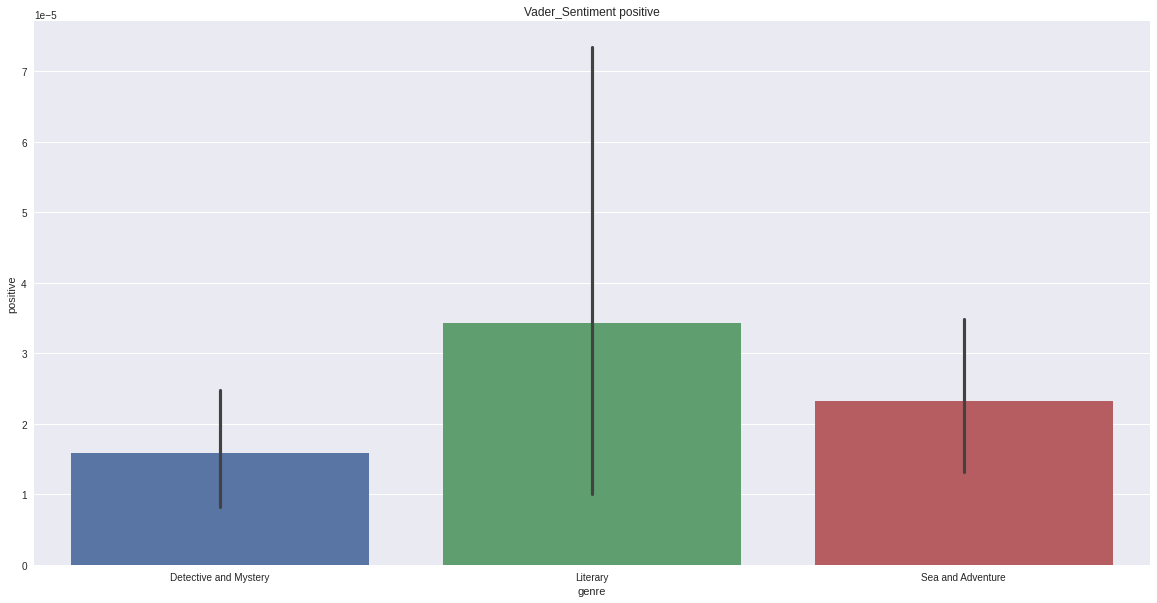

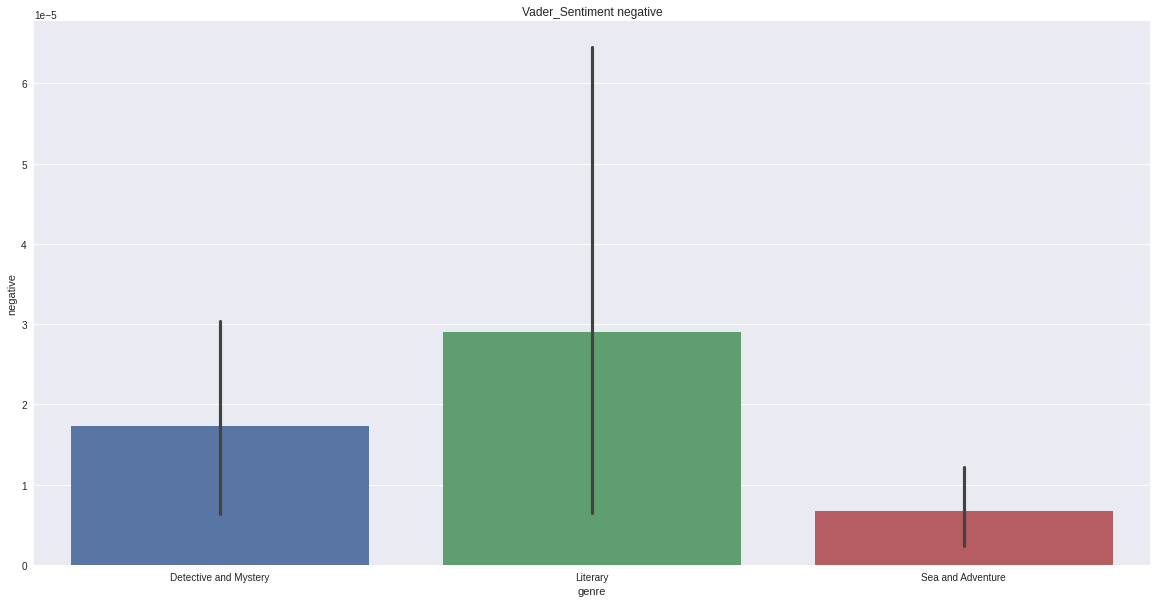

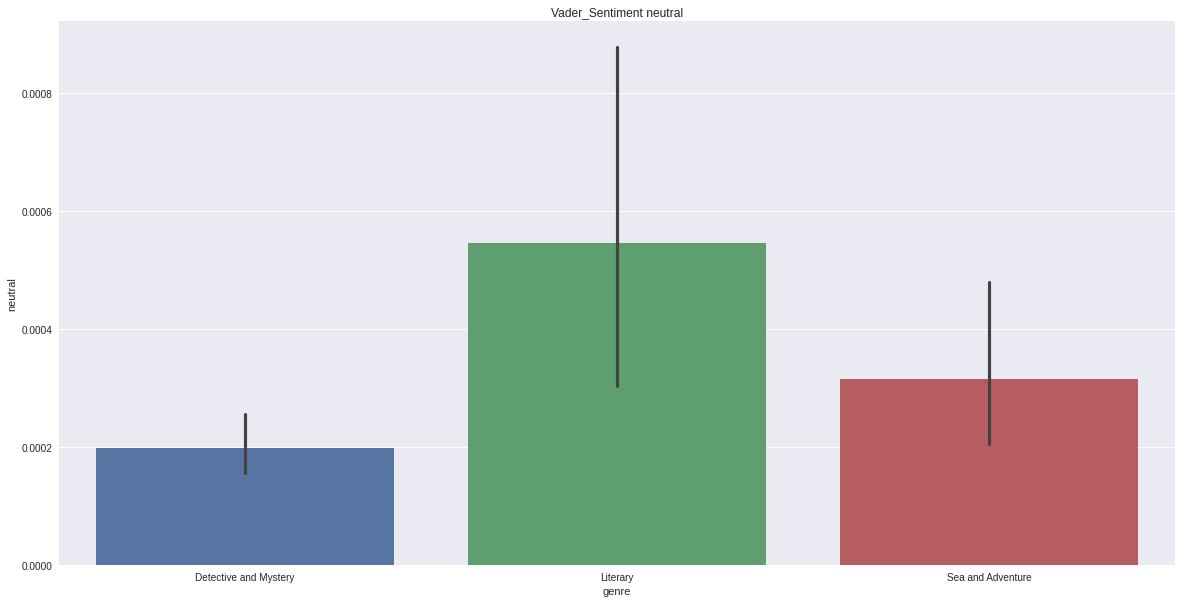

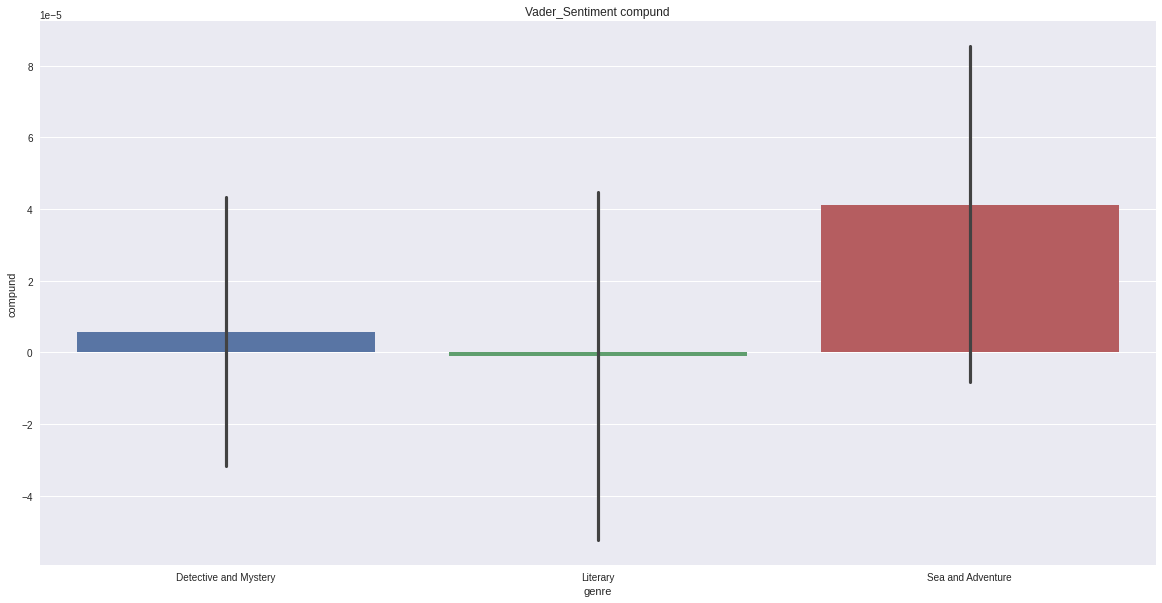

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
for c in df_senti.columns[2:]:
    plt.figure(figsize=(20,10))
    plt.style.use('seaborn')
    sns.barplot(x='genre', y=c, data=df_senti)
    plt.title('Vader_Sentiment {}'.format(c))
    plt.savefig('Vader_Sentiment {}'.format(c))
    plt.show()